<h1>Pistachio Classification Project</h1>


<h1>Introduction</h1>

This is a study to help my understanding of machine learning techniques. 
Looking at a dataset taken from okcupid by the codecademy library. 

The goal of this project is to scope, prep, analyse, and create a machine learning model to solve a question.


**Data sources:**

`pistacio.csv` was provided by kaggle datasets.

In [1]:
# Import the general packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Plot inline on the Jupyter Notebook
plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h2> Pistachio - features </h2>

The data was read and the features were observed by printing the first 5 rows to gain a better understanding of the contents of the data file. The file is read using pandas read_csv function. 

In [2]:
# Read and inspect data
df = pd.read_csv('pistachio.csv')
print(df.head())

    AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  73107  1161.8070    442.4074    217.7261        0.8705  305.0946    0.9424   
1  89272  1173.1810    460.2551    251.9546        0.8369  337.1419    0.9641   
2  60955   999.7890    386.9247    209.1255        0.8414  278.5863    0.9465   
3  79537  1439.5129    466.7973    221.2136        0.8806  318.2289    0.9437   
4  96395  1352.6740    515.8730    246.5945        0.8784  350.3340    0.9549   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        77579  0.7710        2.0319     0.6806       0.6896         0.0061   
1        92598  0.7584        1.8267     0.8151       0.7325         0.0052   
2        64400  0.7263        1.8502     0.7663       0.7200         0.0063   
3        84281  0.7568        2.1102     0.4823       0.6817         0.0059   
4       100950  0.7428        2.0920     0.6620       0.6791         0.0054   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPE

In [3]:
# Inspect the number of classes of Pistachio there are
print(f'There are {df.Class.nunique()} different classes of Pistachio nut.')

There are 2 different classes of Pistachio nut.


It is discovered that there are two classes of pistachio found in the data with several different features in the columns. This is a binary classification problem. 
___________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________

<h3> Visualisation of the parameters of some important features </h3>

The features for each class of pistachio are described and visualised. 

Boxplots are used to show the mean, standard deviation and ranges of the area and perimeter of important features of the two classes of pistachio. Histograms are used to show the distibution of each feature of the pistachio class.



In [4]:
# Print the mean values of each column for both classes of Pistachio
print('nDescription of each feature for Kirmizi Pistachio')
print(df[df['Class'] == 'Kirmizi_Pistachio'].describe())
print('\n\nDescription of each feature for Siit Pistachio')
print(df[df['Class'] == 'Siit_Pistachio'].describe())

nDescription of each feature for Kirmizi Pistachio
               AREA    PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count    998.000000   998.000000  998.000000  998.000000    998.000000   
mean   73313.372745  1373.454453  442.246146  221.000607      0.862858   
std    10884.990899   333.407599   34.323288   22.297268      0.034267   
min    29808.000000   858.363000  321.425500  133.509600      0.624900   
25%    66868.750000  1147.668000  419.963625  208.701300      0.847750   
50%    73991.500000  1244.265500  443.588850  221.656450      0.869250   
75%    80565.000000  1523.730000  466.148900  233.497175      0.884300   
max    96582.000000  2755.049100  525.728900  291.114900      0.946000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  \
count  998.000000  998.000000     998.000000  998.000000    998.000000   
mean   304.617783    0.935043   78390.352705    0.711488      2.016619   
std     23.538202    0.049397   10920.526038    0.054327    

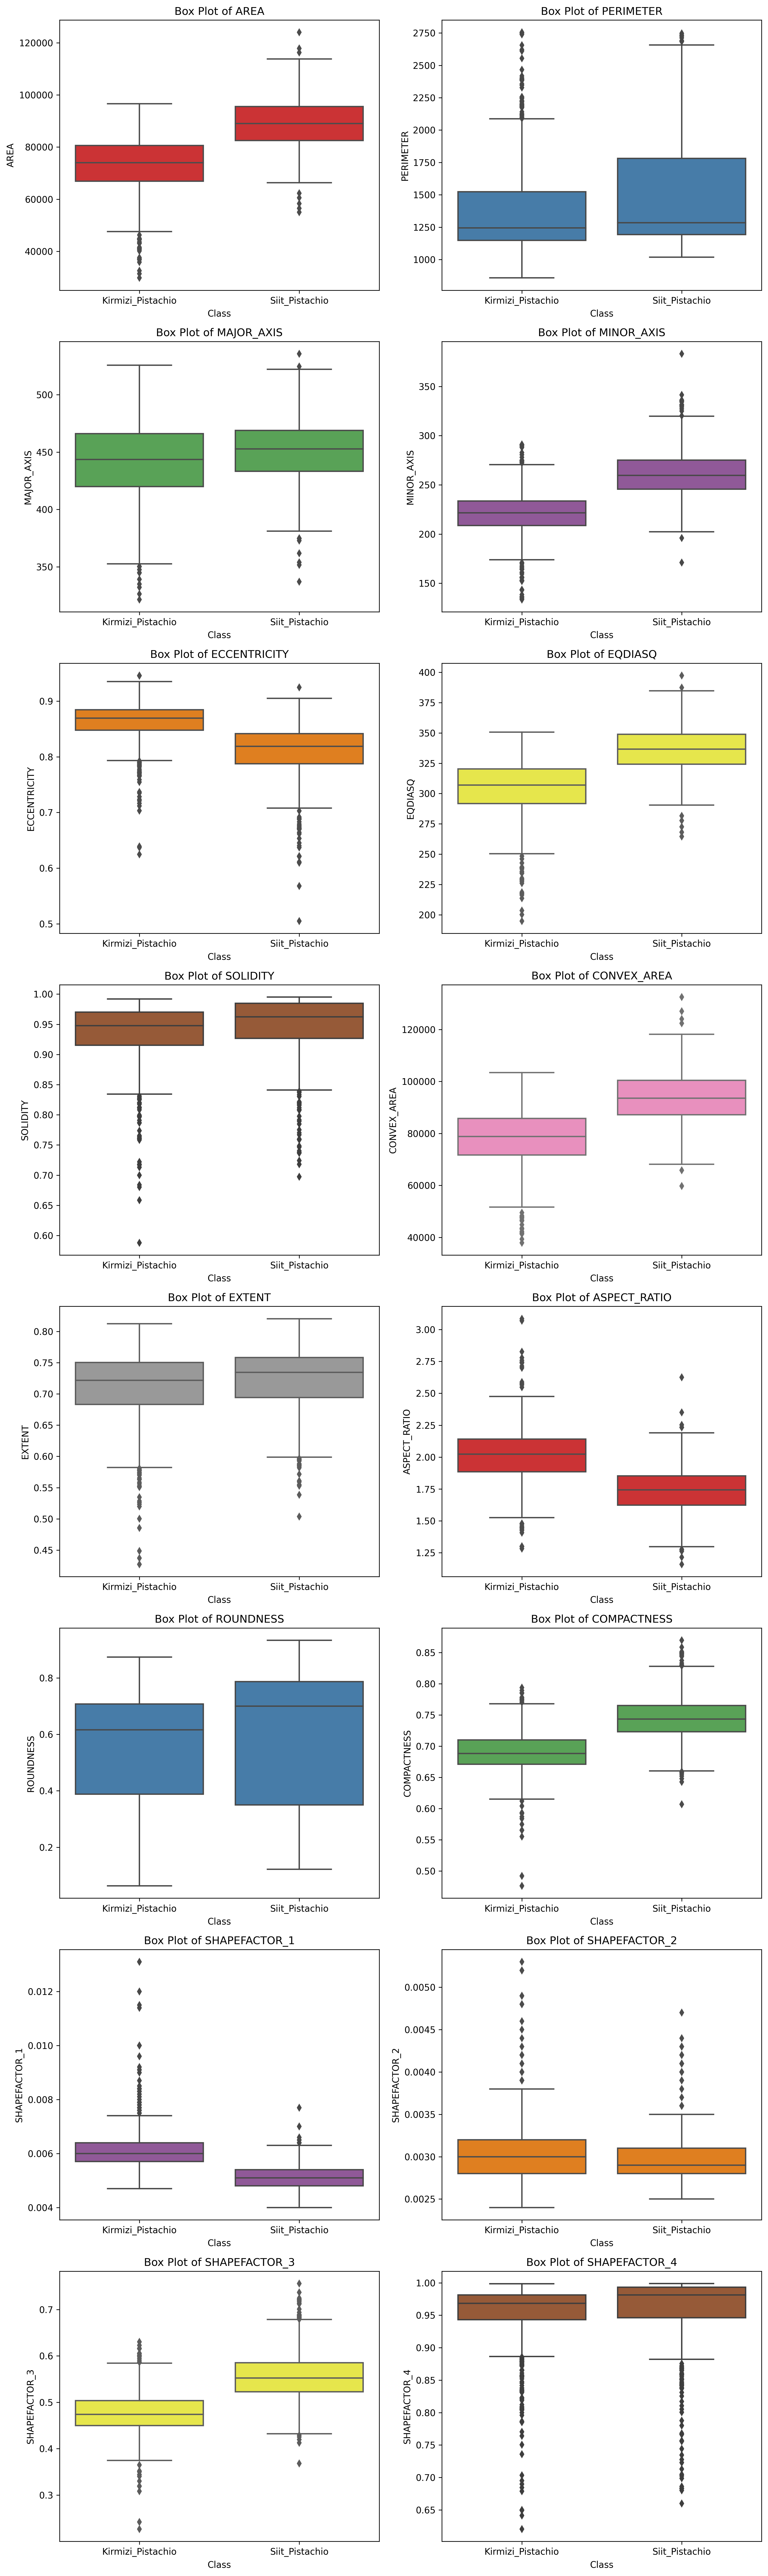

In [5]:
# Select the columns used as the data parameters
column_to_exclude = 'Class'
all_columns = df.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 40),dpi = 300)
colors = sns.color_palette("Set1", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df, x='Class' ,y=column  ,ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


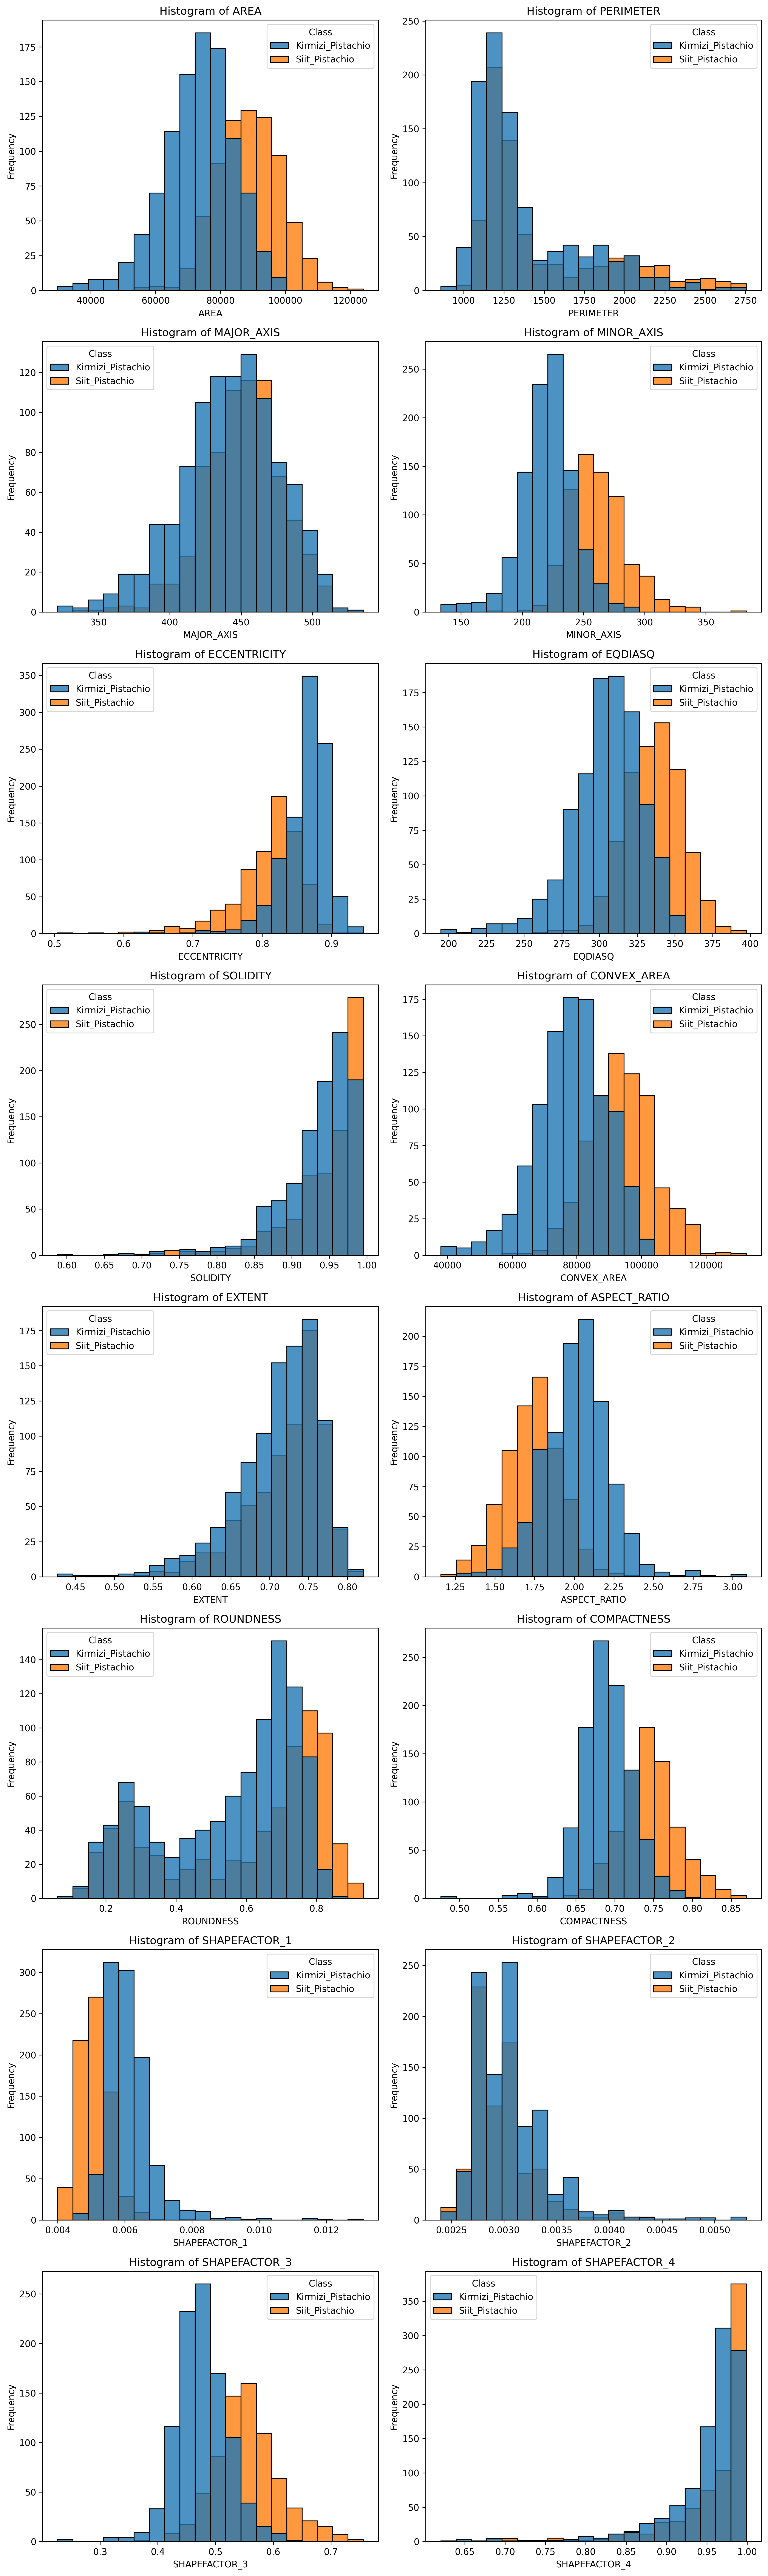

In [8]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 40),dpi = 300)
colors = sns.color_palette("Set1", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=column, hue='Class', ax=axes[row, col], color=colors[i], alpha=0.8, bins=20)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')
    
    axes[row, col].tick_params(axis='x')
    axes[row, col].tick_params(axis='y')
    fig.subplots_adjust(wspace=0.4)
    
if num_columns % 2 != 0:
    axes1[-1, -1].axis('off')
    
plt.tight_layout()
plt.show()

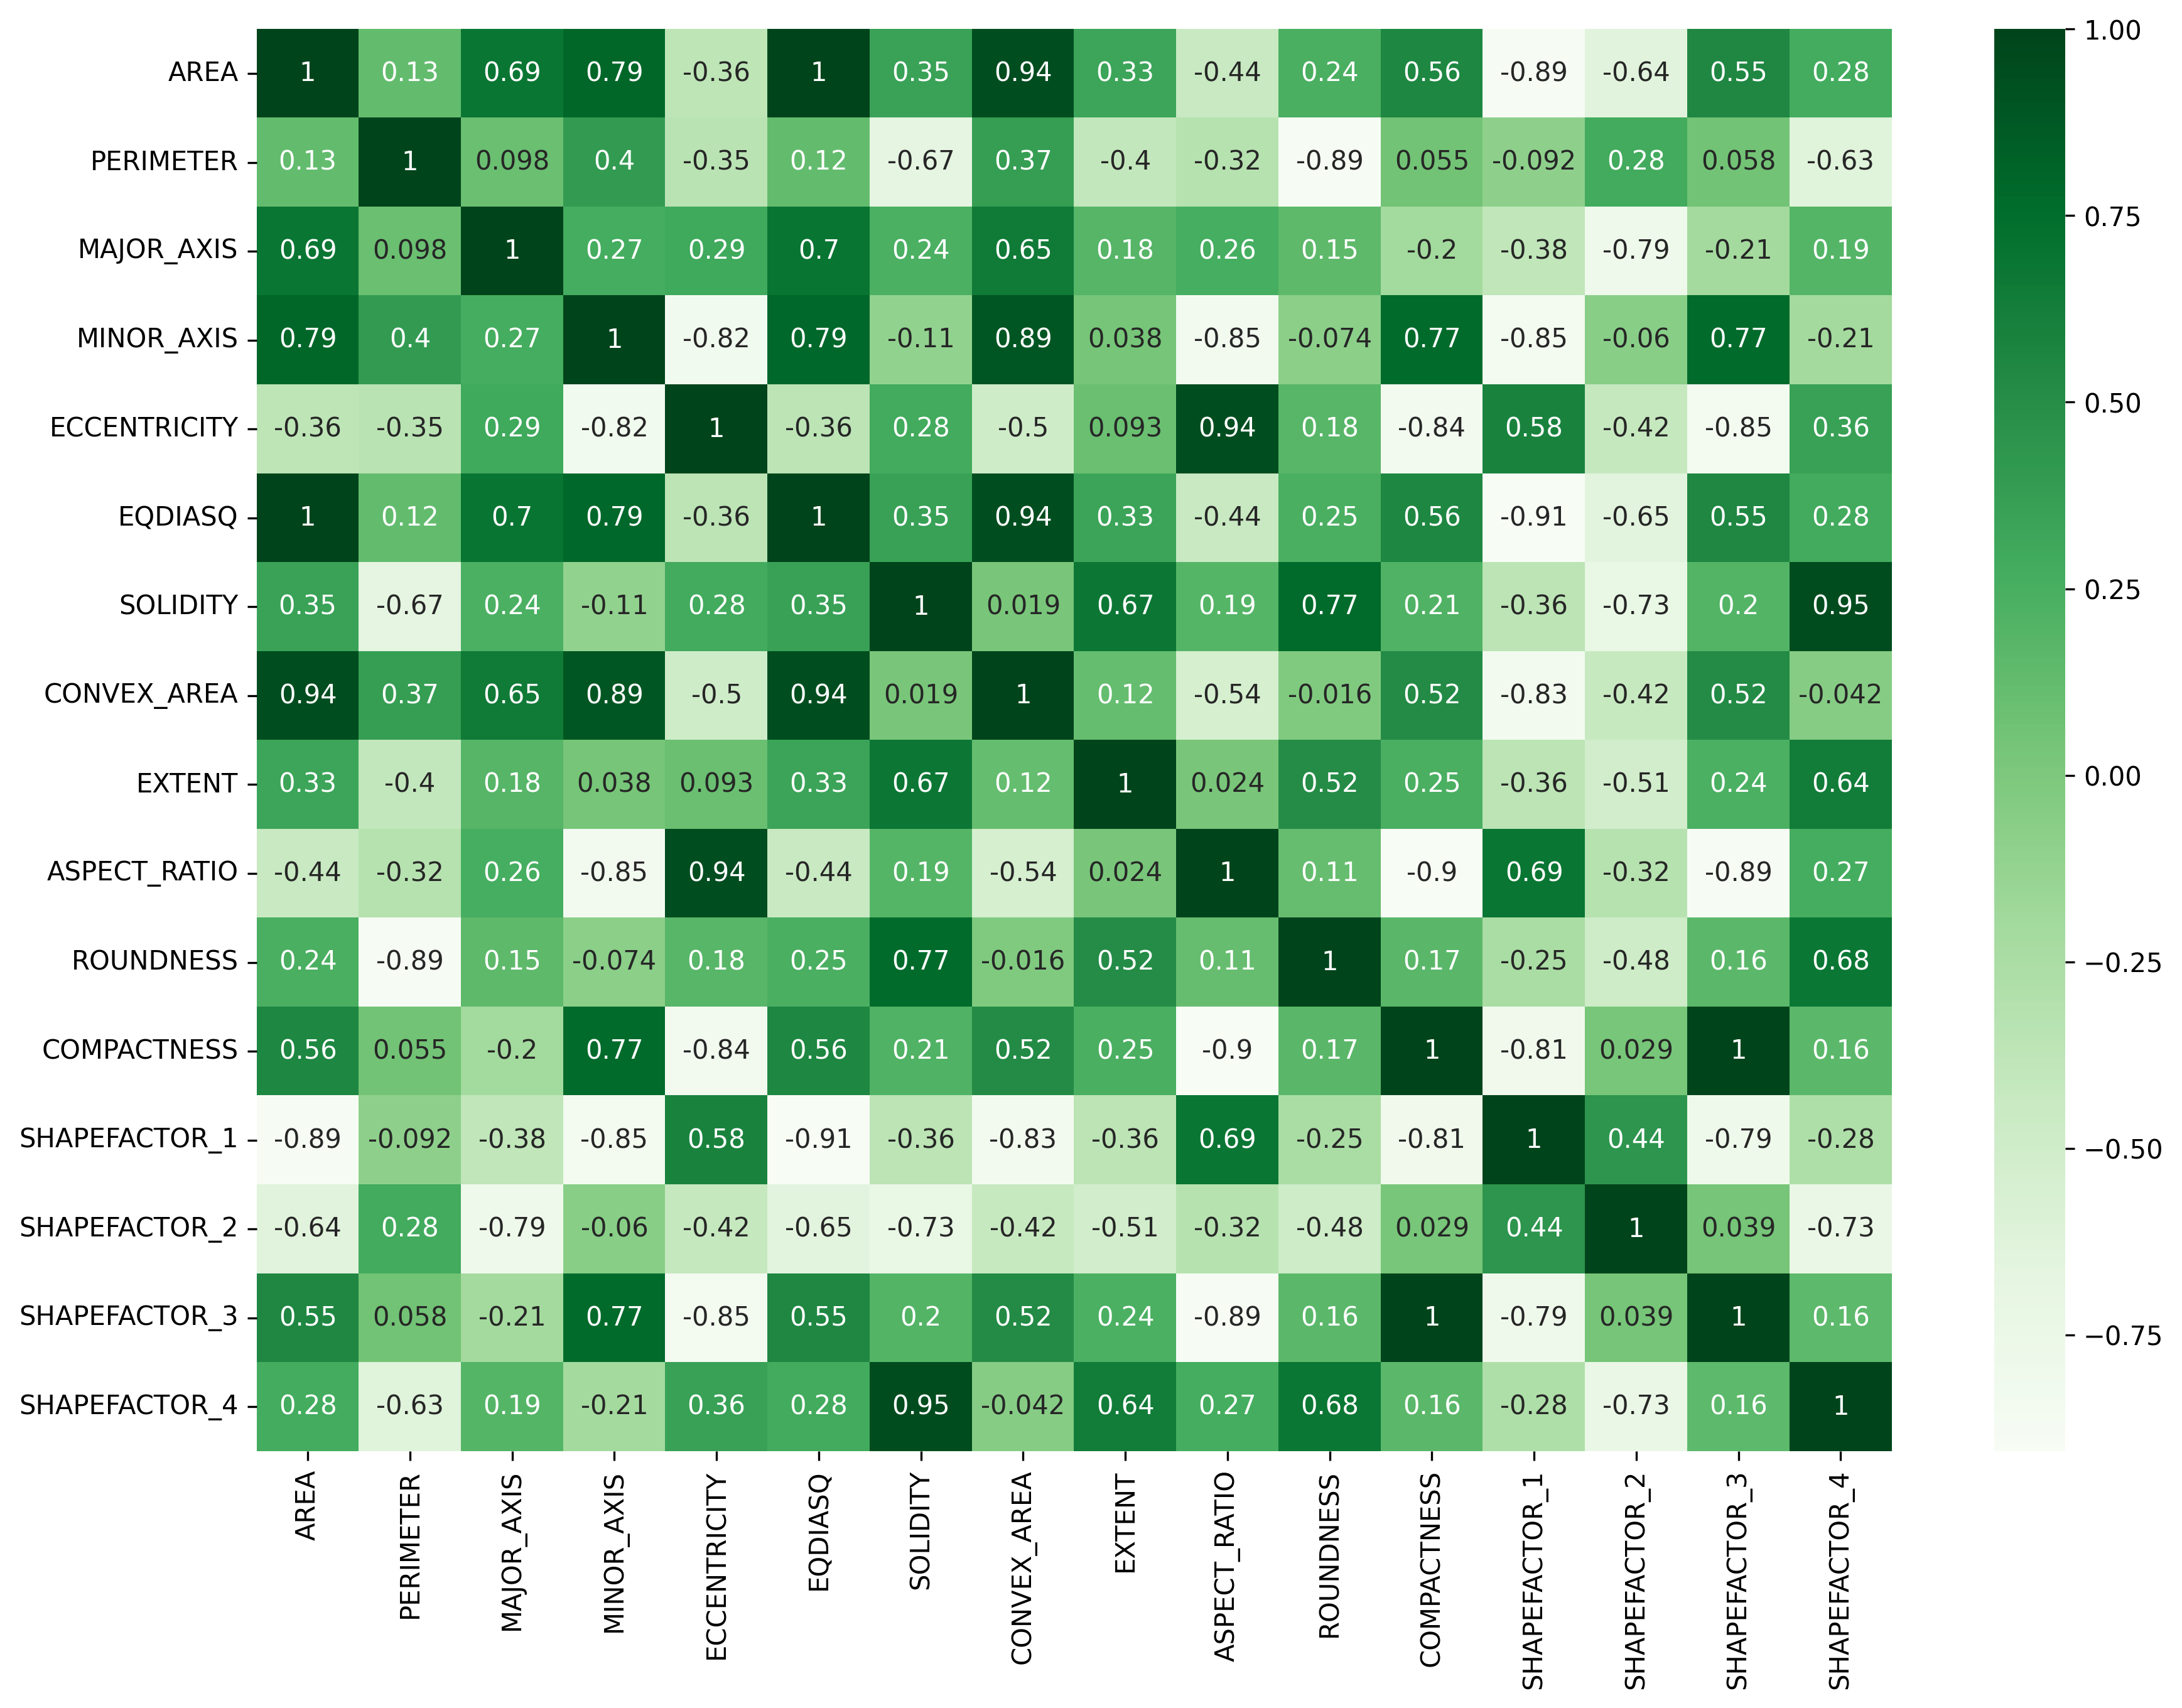

In [9]:
df_corr = df.corr()
plt.figure(figsize = (14, 10), dpi = 300)
sns.heatmap(df_corr,annot = True, cmap='Greens')
plt.show()

<h2> Modeling </h2>

To model the data given, the features are first standardise features by removing the mean and scaling to unit variance (StandardScaler) and the labels are encoded using binary labels 0 and 1.

The data is then split into training and test data and labels using a 20% test size.

In [10]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

labels = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
print(labels)

X = df[columns]
y = df['Class']

# Split the data into training and valiadtion data and labels
training_data, validation_data, training_labels, validation_labels = train_test_split(X, y, test_size = 0.2, random_state = 70)

# Scale data
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(training_data)
X_validation_scaled = scaler.fit_transform(validation_data)

print(validation_labels)


{0: 'Kirmizi_Pistachio', 1: 'Siit_Pistachio'}
1017    1
1586    1
1577    1
1251    0
767     1
       ..
144     1
26      1
450     0
865     0
1413    0
Name: Class, Length: 344, dtype: int64


We can see from the above output that the Kirmizi pistachio has been encoded with the binary number 0 and 1 for Siit.

** K-Nearest Neighbors (KNN) **


KNN is a non-parametric algorithm that classifies new data points based on the majority class among their nearest neighbors in the feature space. The class label is determined based on the K nearest training samples.

The K-Nearest Neighbors (KNN) formula with distance calculation:

$$ y= argmax_c \sum_{i=1}^{K}[x_i \in N_c] $$

Where the distance between two points $x_i$ and $x_j$ is calculated using the Euclidean distance:

$$ d(x_i,x_j) = \sqrt{\sum_{𝑘=1}^n(x_{i,k}−x_{j,k})^2}$$

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using L1, and L2 for p = 2.



In [11]:
# Import K-Neighbours classifier from sklearn package
from sklearn.neighbors import KNeighborsClassifier

# Investigating the effects of the hyper parameters accuracy of the classifier
hyperparameters = [{
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

# Define the K-nearest neighbours classifier and use a grid search to tune the hyperparameters for the best f1 score.
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, hyperparameters, scoring='f1', cv=5)
grid_search.fit(X_training_scaled, training_labels)
best_knn_params = grid_search.best_params_;

print(best_knn_params)


{'n_neighbors': 19, 'p': 2, 'weights': 'distance'}


F1 Score on test data :  0.8637741268830608


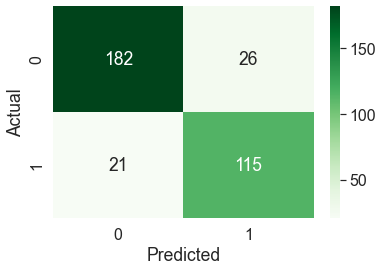

In [12]:
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_training_scaled, training_labels)
y_pred_knn = best_knn.predict(X_validation_scaled)

print('F1 Score on test data : ', f1_score(validation_labels, y_pred_knn, average='weighted'))

knn_cm = confusion_matrix(validation_labels, y_pred_knn)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(knn_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree** 

A decision tree is a simple and interpretable classification algorithm that uses a tree-like model of decisions and their possible consequences. It splits the data based on features to create a hierarchical structure of if-else conditions to make predictions.


In [13]:
from sklearn.tree import DecisionTreeClassifier

hyperparameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}]

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, hyperparameters, scoring='f1', cv=5)
grid_search.fit(X_training_scaled, training_labels)
best_dt_params = grid_search.best_params_

print(best_dt_params)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


F1 Score on test data :  0.8273697679620083


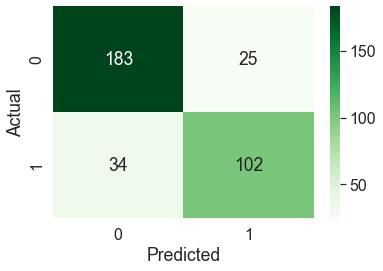

In [14]:
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_training_scaled, training_labels)
y_pred_dt = best_dt.predict(X_validation_scaled)

print('F1 Score on test data : ', f1_score(validation_labels, y_pred_dt, average='weighted'))

dt_cm = confusion_matrix(validation_labels, y_pred_dt)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(dt_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression**

Logistic Regression is a linear classification algorithm used for binary classification tasks. It models the probability of an instance belonging to a certain class using a logistic function and makes predictions based on a predefined threshold.

Logistic Regression Algorithm:

Model the relationship between the features and the probability of a binary outcome.
Estimate the model parameters using maximum likelihood estimation.
Use the logistic function (sigmoid) to predict the probability of the positive class.

The Logistic Regression formula:

$$ p = \dfrac{1}{e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2+ ... + \beta_nx_n)}}$$

The sigmoid function:

$$ \sigma(z) = \dfrac{1}{1+e^{-z}}$$

C-Value - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

Logistic regression not only predicts the class of a sample but also the probability of a sample belonging to each class. 


In [15]:
from sklearn.linear_model import LogisticRegression

lr_params = [{'C': [0.1, 1, 10]}]

lr = LogisticRegression()
lr_grid_search = GridSearchCV(lr, lr_params, scoring='f1', cv=5)
lr_grid_search.fit(X_training_scaled, training_labels)

best_lr_params = lr_grid_search.best_params_

print(best_lr_params)

{'C': 10}


F1 Score on test data :  0.8363636363636364


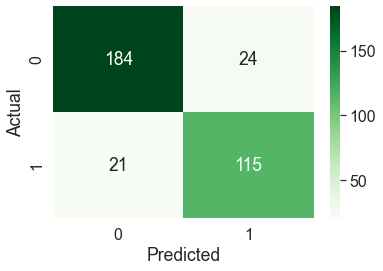

In [16]:
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_training_scaled, training_labels)
y_pred_lr = best_lr.predict(X_validation_scaled)

print('F1 Score on test data : ', f1_score(validation_labels, y_pred_lr))

lr_cm = confusion_matrix(validation_labels, y_pred_lr)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(lr_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Using f1 score, the best algorithm was found to be K-Nearest Neighbours algorithm. The ROC, precision-recall and calibration curve will be plotted. The area under the curve determines the metric of how good the classification model is. The ROC curve represents the true positives.

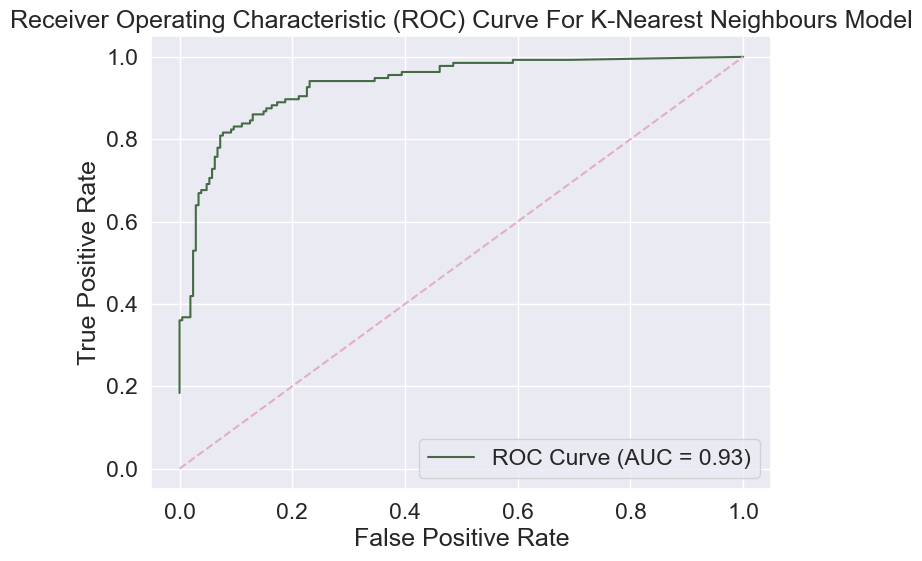

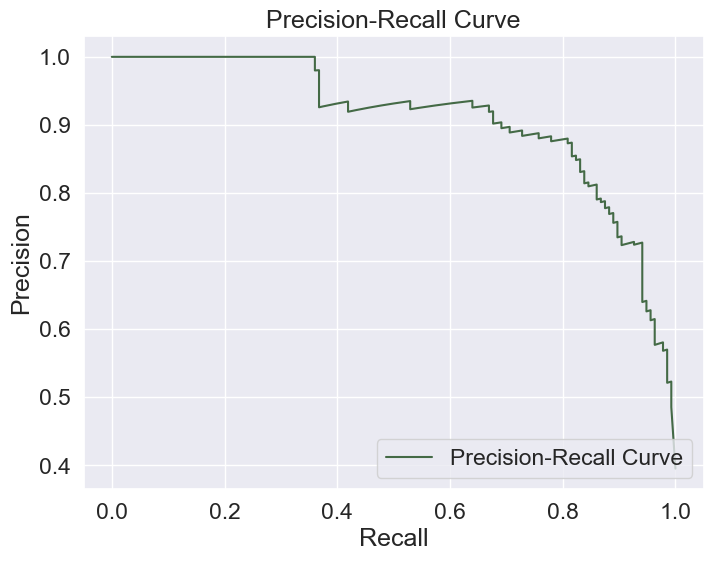

In [17]:
best_algorithm_probs = best_knn.predict_proba(X_validation_scaled)[:, 1]
fpr, tpr, roc_thresholds = roc_curve(validation_labels, best_algorithm_probs)
precision, recall, pr_thresholds = precision_recall_curve(validation_labels, best_algorithm_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr, tpr, color='#446A46', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', color='#E4AEC5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For K-Nearest Neighbours Model')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(recall, precision, color='#446A46', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

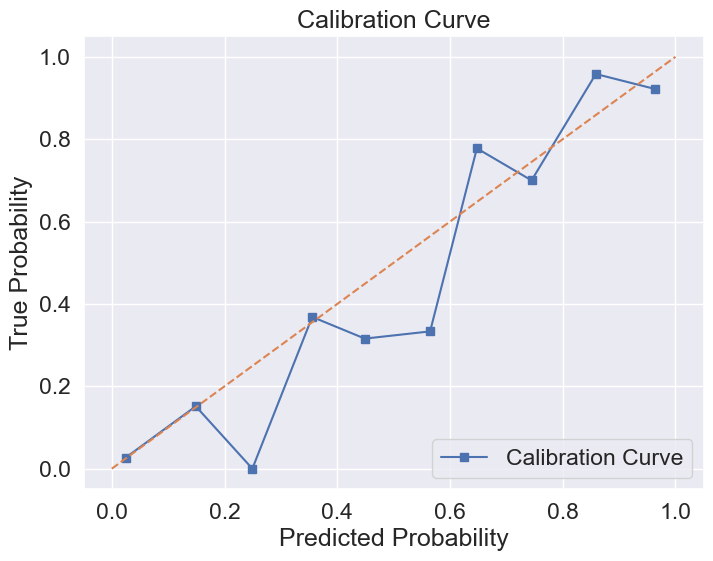

In [18]:
from sklearn.calibration import calibration_curve

true_probs, predicted_probs = calibration_curve(validation_labels, best_algorithm_probs, n_bins=10)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(predicted_probs, true_probs, 's-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend(loc='lower right')
plt.show()

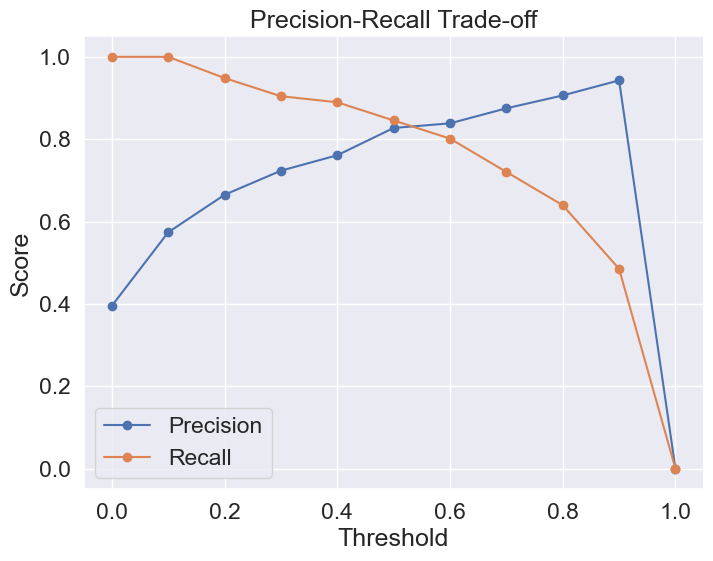

In [19]:
thresholds = np.arange(0, 1.1, 0.1)
precision_values = []
recall_values = []

for threshold in thresholds:
    predicted_labels = best_lr.predict_proba(X_validation_scaled)[:, 1] > threshold
    precision = precision_score(validation_labels, predicted_labels)
    recall = recall_score(validation_labels, predicted_labels)
    precision_values.append(precision)
    recall_values.append(recall)

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(thresholds, precision_values, 'o-', label='Precision')
plt.plot(thresholds, recall_values, 'o-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.legend(loc='lower left')
plt.show()